# Project Part 1

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/sgeinitz/cs39aa_project/blob/main/project_part1.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sgeinitz/cs39aa_project/blob/main/project_part1.ipynb)

This notebook is intended to serve as a template to complete Part 1 of the projects. Feel free to modify this notebook as needed, but be sure to have the two main parts, a) a introductory proposal section describing what it is your doing to do and where the dataset originates, and b) an exploratory analysis section that has the histograms, charts, tables, etc. that are the output from your exploratory analysis. 

__Note you will want to remove the text above, and in the markdown cells below, and replace it with your own text describing the dataset, task, exploratory steps, etc.__

## Introduction/Background

_Do you hate small talk? Have you ever wondered why people don't directly expressed what they want? This dataset looks at different classifications of smalltalk based upon simple phrases. Most rows in this data are a phrase or brief sentence paired with a small talk classification. There are approximately 2500 observations. I will be looking to use machine and deep learning to attempt to correctly classify different phrases for their intent._ 

_Sample Text Below!!!_

_I will have to split the data myself in order to train the model. I could look into small talk generation by picking utterances that match the category and responding with them. I could run into some challenges with sampling because the data does not have an equal number of observation for each Intent. This could cause problems because there is a chance that not each intent class makes it into the training data so test coverage will be very important._

_This data comes from Kaggle. Here is the link to the source data: https://www.kaggle.com/datasets/438983be620c5abf0673a429e3b12997544fadd3c60fd080b30ddcfefb2cde50_

_In this section you will describe (in English) the dataset you are using as well as the NLP problem it deals with. For example, if you are planning to use the Twitter Natural Disaster dataset, then you will describe what the data and where it came as if you were explaining it to someone who does not know anything about the data. You will then describe how this is a __text classification__ problem, and that the labels are binary (e.g. a tweet either refers to a genuine/real natural disaster, or it does not)._ 

_Overall, this should be about a paragraph of text that could be read by someone outside of our class, and they could still understand what it is your project is doing._ 

_Note that you should __not__ simply write one sentence stating, "This project is base on the Kaggle competition: Predicting Natural Disasters with Twitter._"

_If you are still looking for datasets to use, consider the following resources to explore text datasets._

* https://huggingface.co/datasets
* https://www.kaggle.com/datasets
* https://pytorch.org/text/stable/datasets.html
* https://github.com/niderhoff/nlp-datasets 
* https://medium.com/@ODSC/20-open-datasets-for-natural-language-processing-538fbfaf8e38 
* https://imerit.net/blog/25-best-nlp-datasets-for-machine-learning-all-pbm/ 
* https://index.quantumstat.com/#dataset


## Exploratory Data Analysis

_Sample Text Below!!!_

_You will now load the dataset and carry out some exploratory data analysis steps to better understand what text data looks like. See the examples from class on 10/. The following links provide some good resources of exploratory analyses of text data with Python._


* https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
* https://regenerativetoday.com/exploratory-data-analysis-of-text-data-including-visualization-and-sentiment-analysis/
* https://medium.com/swlh/text-summarization-guide-exploratory-data-analysis-on-text-data-4e22ce2dd6ad  
* https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html  


In [17]:
# import all of the python modules/packages you'll need here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk 
# ...

_Importing in the data set into a pandas data frame. We also preview the data by displaying the table below._

In [2]:
df = pd.read_csv('../input/small-talk-intent-classification-data/Small_talk_Intent.csv')
df

,Utterances,Intent
0,who are you?,smalltalk_agent_acquaintance
1,all about you,smalltalk_agent_acquaintance
2,what is your personality,smalltalk_agent_acquaintance
3,define yourself,smalltalk_agent_acquaintance
4,what are you,smalltalk_agent_acquaintance
...,...,...
2542,i'll come back to you in a minute,smalltalk_user_will_be_back
2543,i promise i'll come back,smalltalk_user_will_be_back
2544,i promise to come back,smalltalk_user_will_be_back
2545,i'll be back in a couple of minutes,smalltalk_user_will_be_back


_To verify the number of columns we display each of the column types below._

In [ ]:
df.isna().sum()

_Below is a plot that shows each of the small talk intent categories and the number of observations that each intent class has. When generated, you can see that there is not an even distribution of observation for each class. This will make sampling interesting since there is not a preset training and test datasets._

In [ ]:
plt.figure(figsize=(15,25))
df['Intent'].value_counts().sort_values().plot(kind = 'barh')

_The next plot below shows the number of words in each observation. This good to see just to get a feel for the length of each observation. It will be interesting because I think that there are observations that are only on word long._

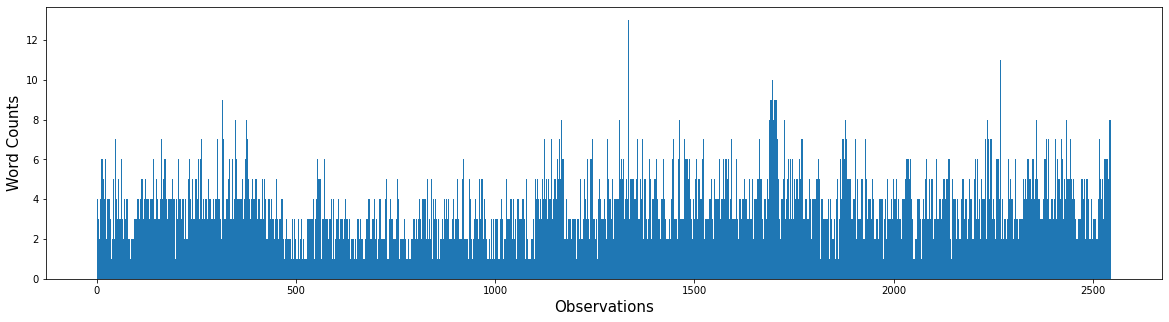

In [15]:
df['numberwords'] = df.Utterances.apply(lambda x: len(x.split()))
plt.figure(figsize=(20,5))
plt.bar(np.arange(len(df.numberwords)), df.numberwords.values, width=1)
plt.xlabel("Observations", fontsize=15)
plt.ylabel("Word Counts", fontsize=15);

_In the plot or table below, it will show the average length of an observation for a given intent class. I do this just to see if there are noticeable differences in the length of the observations that may correlate to certain intent classes that allow the machine learning algorithm might pick up on._

Text(0, 0.5, 'Frequency')

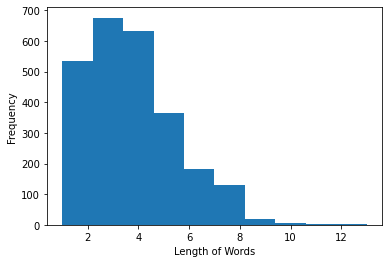

In [40]:
x = df['Utterances'].str.split().\
    map(lambda x: len(x))

plt.hist(x)
plt.xlabel("Length of Words")
plt.ylabel("Frequency")

_Average number length of words below._

Text(0, 0.5, 'Occurences')

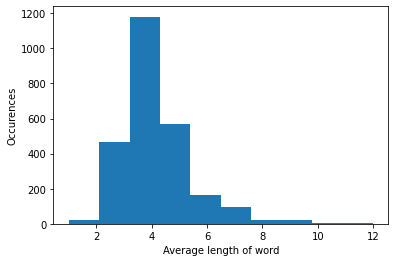

In [38]:
x = df['Utterances'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x))
plt.hist(x)
plt.xlabel('Average length of word')
plt.ylabel('Occurences')

_English Stopword Counts._

Text(0, 0.5, 'Occurences')

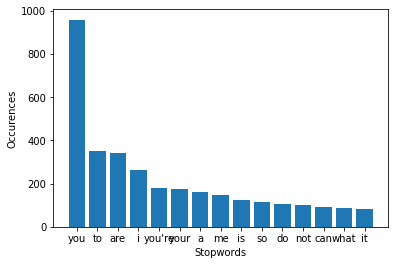

In [36]:
import nltk 
from nltk.corpus import stopwords

stop=set(stopwords.words('english'))
corpus=[]
new= df['Utterances'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1


top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:15]
x,y=zip(*top)
plt.bar(x,y)
plt.xlabel('Stopwords')
plt.ylabel('Occurences')
#dic.sort_values().plot(kind = 'barh')

In [43]:
from nltk.util import ngrams
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

get_top_ngram(df['Utterances'])

NameError: name 'CountVectorizer' is not defined